In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [3]:
splits = tfds.load('stanford_dogs'
,with_info=True,as_supervised=True,split=['train[:80%]','train[80%:]'])

(training_set, validation_set), dataset_info = splits

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteSH5474/stanford_dogs-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteSH5474/stanford_dogs-test.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [0]:
num_examples=dataset_info.splits["train"].num_examples
num_classes=dataset_info.features["label"].num_classes
num_training_examples=round(0.80*num_examples)
num_validation_examples=round(0.20*num_examples)

In [0]:
def strip_label(s):
  if(not "-" in s):
    return s
  index=s.index("-")
  return s[index+1:]

In [5]:
print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {} \n'.format(num_validation_examples))

Total Number of Classes: 120
Total Number of Training Images: 9600
Total Number of Validation Images: 2400 



In [6]:
for i, example in enumerate(training_set.take(5)):
  print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

Image 1 shape: (500, 333, 3) label: 36
Image 2 shape: (367, 400, 3) label: 118
Image 3 shape: (500, 375, 3) label: 46
Image 4 shape: (321, 450, 3) label: 103
Image 5 shape: (333, 500, 3) label: 113


In [0]:
IMAGE_RES = 224

def format_image(image, label):
  image=tf.image.resize(image,(IMAGE_RES,IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches = training_set.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)

validation_batches = validation_set.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)

In [0]:
URL="https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4"
feature_extractor = hub.KerasLayer(URL,(IMAGE_RES,IMAGE_RES,3))

In [0]:
feature_extractor.trainable=False

In [0]:
model = tf.keras.Sequential([
                             feature_extractor,
                             tf.keras.layers.Dense(num_classes)
])


In [0]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [12]:
EPOCHS = 6

history =model.fit(train_batches,epochs=EPOCHS,validation_data=validation_batches) 

Epoch 1/6
300/300 [==============================] - 47s 156ms/step - loss: 0.9959 - accuracy: 0.7794 - val_loss: 0.6084 - val_accuracy: 0.8375
Epoch 2/6
300/300 [==============================] - 45s 149ms/step - loss: 0.4768 - accuracy: 0.8658 - val_loss: 0.6673 - val_accuracy: 0.8325
Epoch 3/6
300/300 [==============================] - 45s 150ms/step - loss: 0.3608 - accuracy: 0.8869 - val_loss: 0.6652 - val_accuracy: 0.8338
Epoch 4/6
300/300 [==============================] - 45s 151ms/step - loss: 0.3008 - accuracy: 0.9039 - val_loss: 0.7104 - val_accuracy: 0.8354
Epoch 5/6
300/300 [==============================] - 45s 151ms/step - loss: 0.2539 - accuracy: 0.9166 - val_loss: 0.7646 - val_accuracy: 0.8288
Epoch 6/6
300/300 [==============================] - 45s 149ms/step - loss: 0.2354 - accuracy: 0.9218 - val_loss: 0.7857 - val_accuracy: 0.8363


In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)


In [19]:
class_names = np.array(dataset_info.features["label"].names)
[strip_label(i) for i in class_names]


['chihuahua',
 'japanese_spaniel',
 'maltese_dog',
 'pekinese',
 'shih-tzu',
 'blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'rhodesian_ridgeback',
 'afghan_hound',
 'basset',
 'beagle',
 'bloodhound',
 'bluetick',
 'black-and-tan_coonhound',
 'walker_hound',
 'english_foxhound',
 'redbone',
 'borzoi',
 'irish_wolfhound',
 'italian_greyhound',
 'whippet',
 'ibizan_hound',
 'norwegian_elkhound',
 'otterhound',
 'saluki',
 'scottish_deerhound',
 'weimaraner',
 'staffordshire_bullterrier',
 'american_staffordshire_terrier',
 'bedlington_terrier',
 'border_terrier',
 'kerry_blue_terrier',
 'irish_terrier',
 'norfolk_terrier',
 'norwich_terrier',
 'yorkshire_terrier',
 'wire-haired_fox_terrier',
 'lakeland_terrier',
 'sealyham_terrier',
 'airedale',
 'cairn',
 'australian_terrier',
 'dandie_dinmont',
 'boston_bull',
 'miniature_schnauzer',
 'giant_schnauzer',
 'standard_schnauzer',
 'scotch_terrier',
 'tibetan_terrier',
 'silky_terrier',
 'soft-coated_wheaten_terrier',
 'west_highland_wh

In [0]:
image_batch, label_batch = next(iter(train_batches))
image_batch=image_batch.numpy()
label_batch=label_batch.numpy()


predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch,axis=-1)
predicted_class_names = class_names[predicted_ids]


In [21]:
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:            [ 26 108  46  10  48 104  39  95  13  42 107 107   6  78  34  44  85  73
  30  81  61 108 100  61  36  89 103 112 109  87  83  73]
Predicted labels:  [ 26 108  46  10  48 104  39  95  13  42 107 107   6  78  34  44  85  73
  30  81  61 108 100  61  42  90 103 111 109  87  83  73]


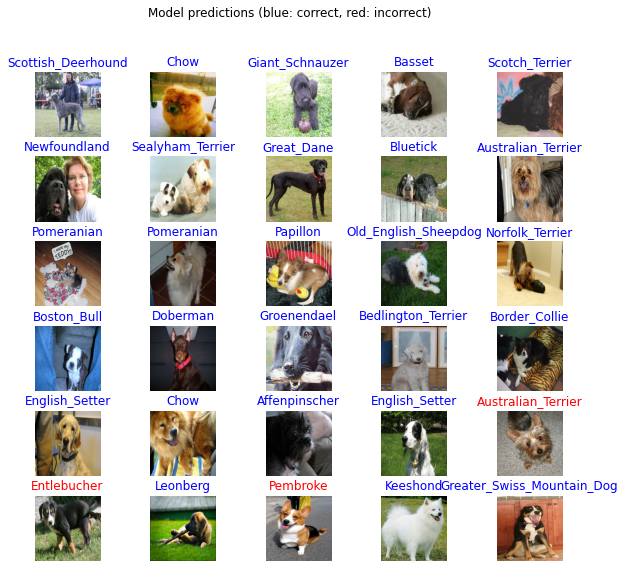

In [24]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(strip_label(predicted_class_names[n].title()), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")